# Dealing with Categorical Variables - Lab

## Introduction

In this lab, you'll explore the Ames Housing dataset and identify numeric and categorical variables. Then you'll transform some categorical data and use it in a multiple regression model.

## Objectives

You will be able to:

* Determine whether variables are categorical or numeric
* Use one-hot encoding to create dummy variables

## Step 1: Load the Ames Housing Dataset

Import `pandas`, and use it to load the file `ames.csv` into a dataframe called `ames`. If you pass in the argument `index_col=0` this will set the "Id" feature as the index.

In [83]:
# Your code here - load the dataset
import pandas as pd

ames = pd.read_csv("ames.csv", index_col = 0)


Visually inspect `ames` (it's ok if you can't see all of the columns).

In [84]:
# Your code here

ames.head()


,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


Go ahead and drop all **columns** with missing data, to simplify the problem. Remember that you can use the `dropna` method ([documentation here](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.dropna.html)).

In [85]:
# Your code here - drop columns with missing data

ames = ames.dropna(axis = "columns")


## Step 2: Identify Numeric and Categorical Variables

The file `data_description.txt`, located in this repository, has a full description of all variables.

Using this file as well as `pandas` techniques, identify the following predictors:

1. A **continuous numeric** predictor
2. A **discrete numeric** predictor
3. A **string categorical** predictor
4. A **discrete categorical** predictor

(Note that `SalePrice` is the target variable and should not be selected as a predictor.)

For each of these predictors, visualize the relationship between the predictor and `SalePrice` using an appropriate plot.

Finding these will take some digging -- don't be discouraged if they're not immediately obvious. The Ames Housing dataset is a lot more complex than the Auto MPG dataset. There is also no single right answer here.

### Continuous Numeric Predictor

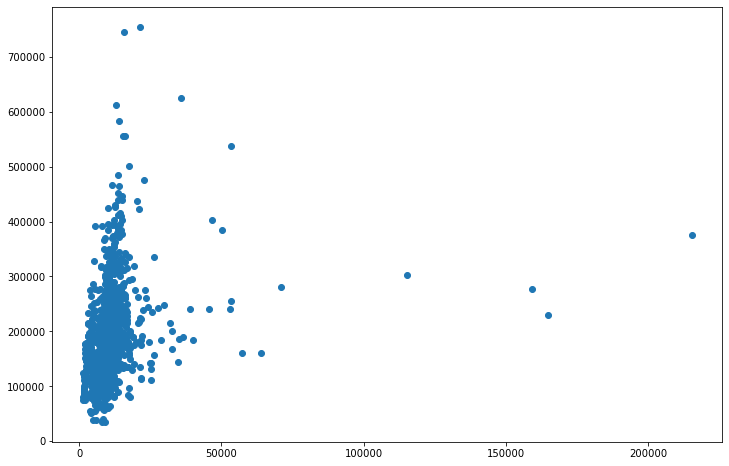

In [86]:
# Your code here - continuous numeric predictor
# Continuous numeric Predictor - LotArea

import matplotlib.pyplot as plt

%matplotlib inline

fig,ax = plt.subplots(figsize = (12,8))
                      
ax.scatter(ames["LotArea"],ames["SalePrice"]);

### Discrete Numeric Predictor

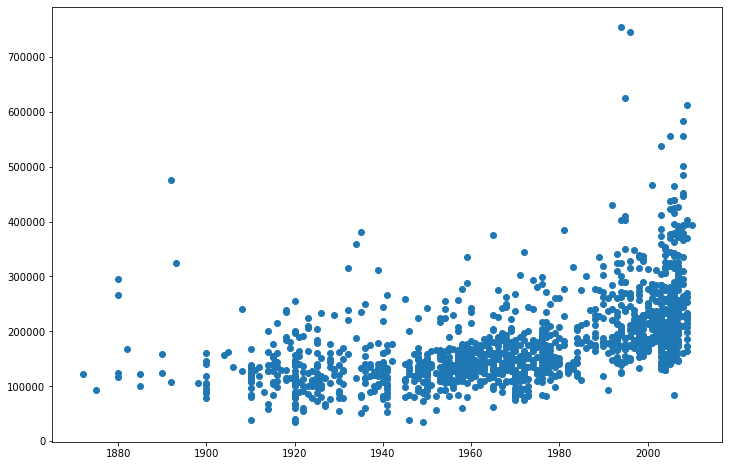

In [87]:
# Your code here - discrete numeric predictor
# Discrete Numeric Predictor - YearBuilt

fig,ax = plt.subplots(figsize = (12,8))
                      
ax.scatter(ames["YearBuilt"],ames["SalePrice"]);


### String Categorical Predictor

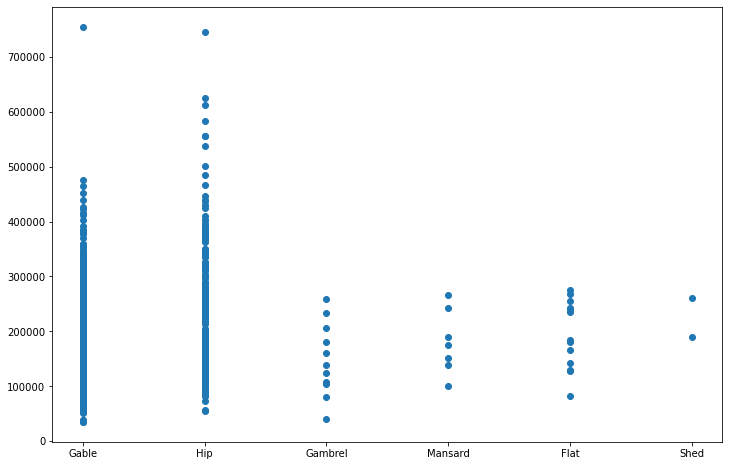

In [88]:
# Your code here - string categorical predictor
# String Categorical predictor - RoofStyle

fig,ax = plt.subplots(figsize = (12,8))
                      
ax.scatter(ames["RoofStyle"],ames["SalePrice"]);


### Discrete Categorical Predictor

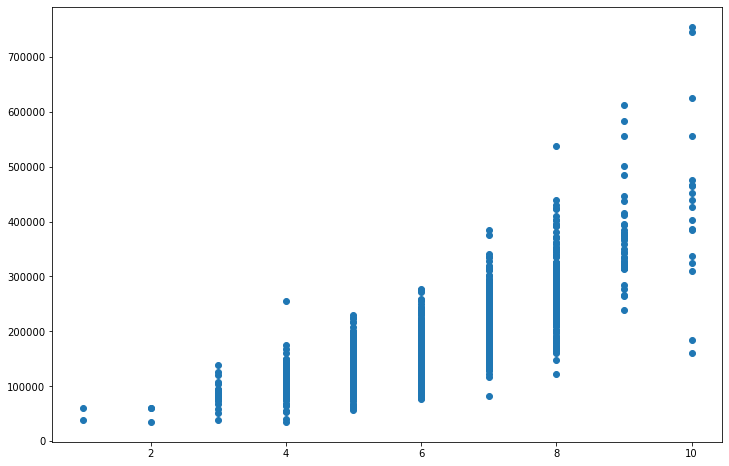

In [89]:
# Your code here - discrete categorical predictor
#String Categorical predictor - OverallCond

fig,ax = plt.subplots(figsize = (12,8))
                      
ax.scatter(ames["OverallQual"],ames["SalePrice"]);



## Step 3: Build a Multiple Regression Model with Your Chosen Predictors

Choose the best-looking 3 out of 4 predictors to include in your model.

Make sure that you one-hot encode your categorical predictor(s) (regardless of whether the current data type is a string or number) first.

In [90]:
# Your code here - prepare X and y, including one-hot encoding

y = ames["SalePrice"]
X = ames[["LotArea", "YearBuilt", "OverallQual"]]

# origin is categorical and needs to be numeric to run regression
X = pd.get_dummies(X, columns=["OverallQual"], drop_first=True, dtype=int) 


In [91]:
# Your answer here - which category or categories were dropped?

"""Category dropped was 1 in the OverallQual discrete categorical predictor"""

'Category dropped was 1 in the OverallQual discrete categorical predictor'

In [92]:
# Your code here - build a regression model and display results

import statsmodels.api as sm

model = sm.OLS(y, sm.add_constant(X)) 
results = model.fit()

print(results.summary())


                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.725
Model:                            OLS   Adj. R-squared:                  0.723
Method:                 Least Squares   F-statistic:                     347.6
Date:                Tue, 12 Nov 2024   Prob (F-statistic):               0.00
Time:                        17:49:19   Log-Likelihood:                -17601.
No. Observations:                1460   AIC:                         3.523e+04
Df Residuals:                    1448   BIC:                         3.529e+04
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const          -6.611e+05   9.21e+04     -7.

## Step 4: Create Partial Regression Plots for Features

For each feature of the regression above (including the dummy features), plot the partial regression.

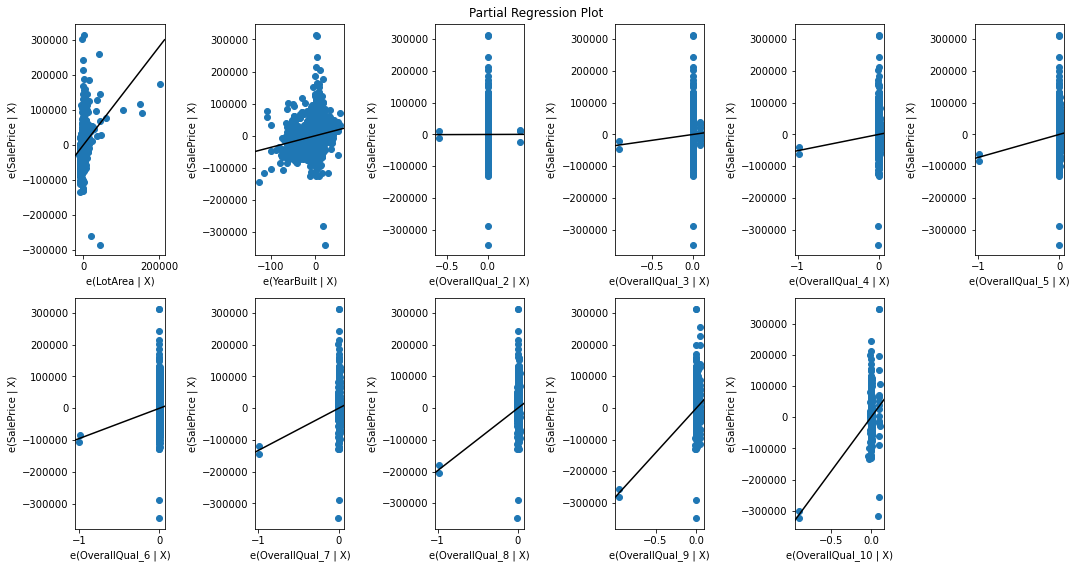

In [93]:
# Your code here - create partial regression plots

fig = plt.figure(figsize=(15,8))
sm.graphics.plot_partregress_grid(
    results,
    exog_idx=list(X.columns.values),
    grid=(2,6),
    fig=fig)
plt.show()


## Step 5: Calculate an Error-Based Metric

In addition to the adjusted R-Squared that we can see in the model summary, calculate either MAE or RMSE for this model.

In [94]:
# Your code here - calculate an error-based metric

mae = results.resid.abs().sum()/len(y)
mae
rmse =((results.resid **2).sum()/len(y))**0.5

print(f"Mean Squared Error = {mae}")
print(f"Root Mean Squared Error = {rmse}")

Mean Squared Error = 27520.961196066208
Root Mean Squared Error = 41622.01333019102


## Step 6: Summarize Findings

Between the model results, partial regression plots, and error-based metric, what does this model tell you? What would your next steps be to improve the model?

In [95]:
# Your answer here

"""The model explains roughly 72% of the variation in Sale Price. 


For a house with Lot Area and Year Built of 1800, as well as having an overall condition of 1, we would expect
SalePrice to be about -661100
For each increase of 1 in Lot Area, we see an associated increase in SalePrice of about 1.4702
For each year newer of house built, we see an associated increase in SalePrice of about 362.2912
Breaking down the Overall Quality:
At 5% significance, there is no statistical difference between Quality 1 2,3 and 4.
For Quality 5 compared to Quality 1, we see an associated increase in SalePrice of about 72140
For Quality 6 compared to Quality 1, we see an associated increase in SalePrice of about 95730
For Quality 7 compared to Quality 1, we see an associated increase in SalePrice of about 132900
For Quality 8 compared to Quality 1, we see an associated increase in SalePrice of about 196800
For Quality 9 compared to Quality 1, we see an associated increase in SalePrice of about 283300
For Quality 10 compared to Quality 1, we see an associated increase in SalePrice of about 350100


As per the partial regression plots, it shows that Year built is a good predictor 0f SalePrice while LotArea not so much. The 
effect size is much larger as the Overall Quality goes up and that there is a distinct difference between houses with Overall
Quality1 and those with Quality 5 and above. 
To improve the model, I would drop Lot size and choose another predictor to improve the amount of variation explained 
by the model. In addition, I would try and fir a different categorical variable which has all the coefficients being statistically
significant. """


'The model explains roughly 72% of the variation in Sale Price. \n\n\nFor a house with Lot Area and Year Built of 1800, as well as having an overall condition of 1, we would expect\nSalePrice to be about -661100\nFor each increase of 1 in Lot Area, we see an associated increase in SalePrice of about 1.4702\nFor each year newer of house built, we see an associated increase in SalePrice of about 362.2912\nBreaking down the Overall Quality:\nAt 5% significance, there is no statistical difference between Quality 1 2,3 and 4.\nFor Quality 5 compared to Quality 1, we see an associated increase in SalePrice of about 72140\nFor Quality 6 compared to Quality 1, we see an associated increase in SalePrice of about 95730\nFor Quality 7 compared to Quality 1, we see an associated increase in SalePrice of about 132900\nFor Quality 8 compared to Quality 1, we see an associated increase in SalePrice of about 196800\nFor Quality 9 compared to Quality 1, we see an associated increase in SalePrice of abo

## Level Up (Optional)

Try transforming X using scikit-learn _and_ fitting a scikit-learn linear regression as well. If there are any differences in the result, investigate them.

In [115]:
# Your code here

from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder(drop = "first", sparse = False)
data_cat = ames[["OverallQual"]].copy()
ohe.fit(data_cat)
ohe.transform(data_cat)

data_cat_ohe = pd.DataFrame(data =ohe.transform(data_cat),
                           columns = [f"OverallQual_{cat}" for cat in ohe.categories_[0][1:]])
data_cat_ohe

df2 = ames[["SalePrice","LotArea", "YearBuilt"]]
df2 = df2.reset_index()

y= df2["SalePrice"]

X_sklearn = pd.concat([df2[["LotArea", "YearBuilt"]],data_cat_ohe],axis = 1)

X_sklearn

from sklearn.linear_model import LinearRegression

sklearn_model = LinearRegression()
sklearn_model.fit(X_sklearn, y)


#model_2 = sm.OLS(y,sm.add_constant(X_sklearn))
#results_2 = model_2.fit()

print(f"""
StatsModels R-Squared:    {results.rsquared}
scikit-learn R-Squared:   {sklearn_model.score(X_sklearn, y)}

""")




StatsModels R-Squared:    0.7253131335838727
scikit-learn R-Squared:   0.7253131335838727




In [116]:
print(f"""
StatsModels intercept:     {results.params["const"]}
scikit-learn intercept:    {sklearn_model.intercept_}

StatsModels coefficients:  {results.params[1:].values}
scikit-learn coefficients: {sklearn_model.coef_}
""")


StatsModels intercept:     -661089.4956456451
scikit-learn intercept:    -661089.4956457115

StatsModels coefficients:  [1.40722777e+00 3.62291218e+02 7.93656952e+02 3.66006255e+04
 5.11141601e+04 7.21421655e+04 9.57253762e+04 1.32887135e+05
 1.96768533e+05 2.83275613e+05 3.50072496e+05]
scikit-learn coefficients: [1.40722777e+00 3.62291218e+02 7.93656952e+02 3.66006255e+04
 5.11141601e+04 7.21421655e+04 9.57253762e+04 1.32887135e+05
 1.96768533e+05 2.83275613e+05 3.50072496e+05]



## Summary

In this lab, you practiced your knowledge of categorical variables on the Ames Housing dataset! Specifically, you practiced distinguishing numeric and categorical data. You then created dummy variables using one hot encoding in order to build a multiple regression model.